NAME : KELVIN CHRISTOBER

ROLL NO : 215229120

# Employee Hopping Prediction using Random Forests

### Step1. [Understand Data]

In [1]:
import pandas as pd
data = pd.read_csv('Employee_hopping.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
data.shape

(1470, 35)

In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Step2. [Extract X and y]

In [7]:
data.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [8]:
X = data.drop(['Attrition'],axis=1)
y = data.Attrition

In [9]:
y = y.apply(lambda x:1 if x == 'Yes' else 0)

### Step3. [Feature Engineering]

In [11]:
data=pd.get_dummies(data,columns=["BusinessTravel","Department",'EducationField',"Gender","JobRole","MaritalStatus","Over18","OverTime"])
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,No,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,Yes,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,No,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,No,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


### Step4. Now, check shape of X and y

In [12]:
X = data.drop(['Attrition'], axis=1)

In [13]:
X.shape

(1470, 55)

In [14]:
y.shape

(1470,)

### Step5. [Model Development]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
from sklearn.ensemble import RandomForestClassifier
seed = 0
rfc = RandomForestClassifier(n_estimators=1000, max_depth=4, min_samples_leaf=2, n_jobs=-1, max_features='sqrt')

In [18]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
y_pred = rfc.predict(X_test)

### Step6. [Testing].

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8505434782608695

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92       310
          1       1.00      0.05      0.10        58

avg / total       0.87      0.85      0.79       368



### Step7. [Feature importance value]

In [25]:
print(rfc.feature_importances_)

[0.07085794 0.03084833 0.01952015 0.00614106 0.         0.01840895
 0.02142188 0.01965465 0.01885258 0.04710242 0.01698444 0.09034949
 0.02325597 0.01854405 0.01459123 0.00194492 0.00874513 0.
 0.03609699 0.07738236 0.00847752 0.01877247 0.05733395 0.02983955
 0.010732   0.05474413 0.00296982 0.01565781 0.00397356 0.00080784
 0.00756353 0.00678745 0.00362376 0.00240117 0.00554108 0.00299111
 0.00082986 0.00499229 0.00255145 0.00273975 0.00082572 0.00160809
 0.00715198 0.00031517 0.00193116 0.00094477 0.00458485 0.00436247
 0.02079192 0.00335151 0.00654774 0.02835209 0.         0.06553963
 0.06966026]


In [26]:
imp_values = pd.DataFrame(rfc.feature_importances_, index = X_train.columns, columns=['Important Score'])

In [28]:
from operator import itemgetter

x = imp_values.index
y = imp_values['Important Score']

lst = []
print("Feature Name - Feature Importance Score")
print("=======================================")
for i in range(55):
    lst.append((x[i], y[i]))
sorted(lst,key=itemgetter(1))
FIS = lst[:]
FIS

Feature Name - Feature Importance Score


[('Age', 0.0708579384759188),
 ('DailyRate', 0.03084832550685603),
 ('DistanceFromHome', 0.019520151195116086),
 ('Education', 0.006141062346162183),
 ('EmployeeCount', 0.0),
 ('EmployeeNumber', 0.01840894915655159),
 ('EnvironmentSatisfaction', 0.02142188416979282),
 ('HourlyRate', 0.01965464876379449),
 ('JobInvolvement', 0.018852582778266673),
 ('JobLevel', 0.047102418550693415),
 ('JobSatisfaction', 0.016984437683083293),
 ('MonthlyIncome', 0.09034948521263217),
 ('MonthlyRate', 0.023255973917995738),
 ('NumCompaniesWorked', 0.018544046876487672),
 ('PercentSalaryHike', 0.014591233309305646),
 ('PerformanceRating', 0.0019449240013198646),
 ('RelationshipSatisfaction', 0.008745134328157132),
 ('StandardHours', 0.0),
 ('StockOptionLevel', 0.03609699095792788),
 ('TotalWorkingYears', 0.0773823562534575),
 ('TrainingTimesLastYear', 0.00847752487108548),
 ('WorkLifeBalance', 0.018772473874133076),
 ('YearsAtCompany', 0.057333945207353194),
 ('YearsInCurrentRole', 0.029839546203868805),


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

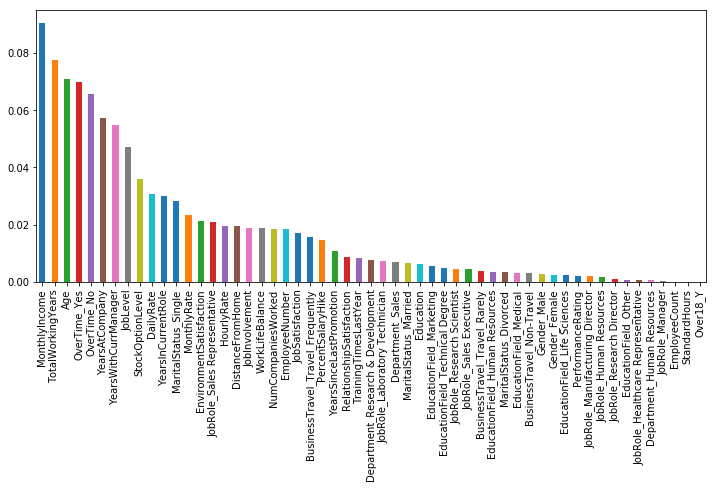

In [33]:
pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,5))

### Step8. [Visualize your RF Decision Tree using graphviz]

In [34]:
estimator = rfc.estimators_[5]

In [44]:
from sklearn import tree
from sklearn.tree import export_graphviz
with open("RFDT.dot", 'w') as f:
    f = tree.export_graphviz(estimator, out_file=f, max_depth=4, impurity=False, feature_names=X_train.columns)

In [45]:
!dot -Tpng RFDT.dot -o RFDT.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


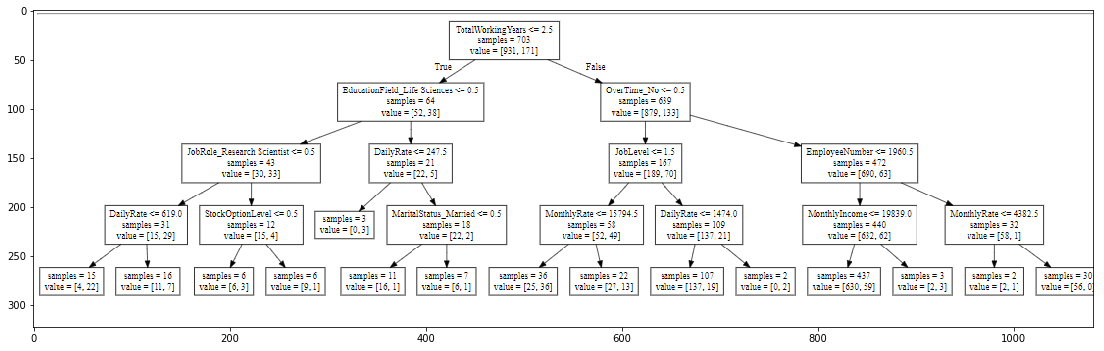

In [51]:
import matplotlib.pyplot as plt

image = plt.imread('RFDT.png')
plt.figure(figsize=(19,15))
plt.imshow(image)

### Step9. [RF with a range of trees]

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
rf2 = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True, n_jobs=-1)
oob_list = list()

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    rf2.set_params(n_estimators=n_trees)
    rf2.fit(X_train, y_train)
    oob_error = 1 - rf2.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

,oob
n_trees,
15.0,0.170599
20.0,0.157895
30.0,0.153358
40.0,0.140653
50.0,0.138838
100.0,0.140653
150.0,0.141561
200.0,0.144283
300.0,0.145191


### Step10. [Plot oob-error for each tree]

[Text(0,0.5,'out-of-bag error')]

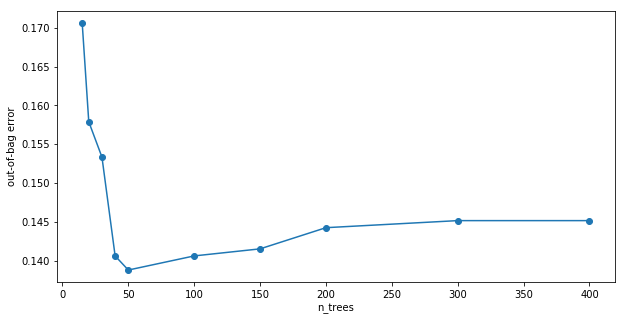

In [40]:
ax = rf_oob_df.plot(legend=False, marker='o', figsize=(10,5))
ax.set(ylabel='out-of-bag error')

### Step11. [Compare with DecisionTreeClassifier]

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_test,y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [42]:
y_pred1 = clf.predict(X_test)
y_pred1

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [54]:
from sklearn import tree
from sklearn.tree import export_graphviz
with open("DTC2.dot", 'w') as f:
    f = tree.export_graphviz(clf,out_file=f,max_depth = 4,impurity = False,feature_names = X_train.columns.values)

In [55]:
!dot -Tpng DTC2.dot -o DTC2.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


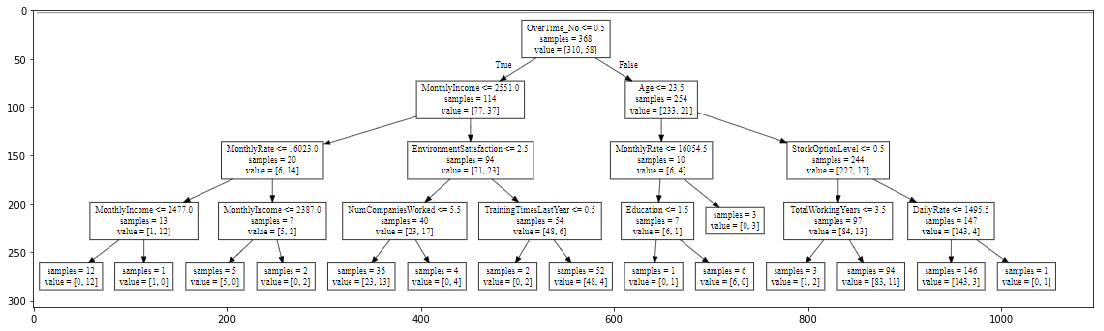

In [57]:
image = plt.imread('DT2.png')
plt.figure(figsize=(19,15))
plt.imshow(image)

In [58]:
print("Accuracy of test :",clf.score(X_test,y_test))

Accuracy of test : 0.9130434782608695


In [59]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92       310
          1       1.00      0.05      0.10        58

avg / total       0.87      0.85      0.79       368



In [60]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, classification_report,f1_score

In [61]:
print("RF model :",accuracy_score(y_test,y_pred))
print("RF Precision:",precision_score(y_test,y_pred))
print("RF Recall :",recall_score(y_test,y_pred))
print("RF F1 score :",f1_score(y_test,y_pred))
print("\n")
print("DT model :",accuracy_score(y_test,y_pred1))
print("DT Precision:",precision_score(y_test,y_pred1))
print("DT Recall :",recall_score(y_test,y_pred1))
print("DT F1 score :",f1_score(y_test,y_pred1))

RF model : 0.8505434782608695
RF Precision: 1.0
RF Recall : 0.05172413793103448
RF F1 score : 0.09836065573770492


DT model : 0.9130434782608695
DT Precision: 0.9642857142857143
DT Recall : 0.46551724137931033
DT F1 score : 0.627906976744186
